<a href="https://colab.research.google.com/github/spacemaninSeoul/road_to_NLPmaster/blob/main/Language_model_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**언어 모델(Languagel Model)**이란 단어 시퀀스(문장)에 확률을 할당하는 모델을 말합니다. 어떤 문장들이 있을 때, 기계가 이 문장은 적절해! 이 문장은 말이 안 돼! 라고 사람처럼 정확히 판단할 수 있다면, 기계이 자연어 처리의 성능이 뛰어나다고 말할 수 있습니다.

이번 챕터에서는 통계에 기반한 전통적인 언어 모델(Statistical Languagel Model, SLM)에 대해서 학습합니다. 통계에 기반한 언어 모델은 우리가 실제 사용하는 자연어를 근사하기에는 많은 한계가 있었고, 요즘 들어 인공 신경망이 그러한 한계를 많이 해결해주면서 통계 기반 언어 모델은 많이 사용 용도가 줄었습니다. 하지만 그럼에도 통계 기반 방법론에 대한 이해는 언어 모델에 대한 전체적인 시야를 갖는 일에 도움이 됩니다.



# 1. 언어 모델(Language Model)이란?

**언어 모델(Language Model, LM)**은 언어라는 현상을 모델링하고자 단어 시퀀스(문장)에 확률을 할당(assign)하는 모델입니다.

언어 모델을 만드는 방법은 크게는 **통계를 이용한 방법**과 **인공 신경망을 이용한 방법**으로 구분할 수 있습니다. 최근에는 통계를 이용한 방법보다는 인공 신경망을 이용한 방법이 더 좋은 성능을 보여주고 있습니다. 최근 핫한 자연어 처리의 기술인 GPT나 BERT 또한 인공 신경망 언어 모델의 개념을 사용하여 만들어졌습니다. 이번 챕터에서는 언어 모델의 개념과 언어 모델의 전통적 접근 방식인 통계적 언어 모델에 대해서 배웁니다.




## 1) 언어 모델(Language Model)

언어 모델은 **단어 시퀀스에 확률을 할당(assign)** 하는 일을 하는 모델입니다. 이를 조금 풀어서 쓰면, 언어 모델은 가장 자연스러운 단어 시퀀스를 찾아내는 모델입니다. 단어 시퀀스에 확률을 할당하게 하기 위해서 가장 보편적으로 사용되는 방법은 언어 모델이 **이전 단어들이 주어졌을 때 다음 단어를 예측**하도록 하는 것입니다.

다른 유형의 언어 모델로는 주어진 양쪽의 단어들로부터 가운데 비어있는 단어를 예측하는 언어 모델이 있습니다. 이는 문장의 가운데에 있는 단어를 비워놓고 양쪽의 문맥을 통해서 빈 칸의 단어인지 맞추는 고등학교 수험 시험의 빈칸 추론 문제와 비슷합니다. 이 유형의 언어 모델은 맨 마지막 BERT 챕터에서 다루게 될 예정이고, 그때까지는 이전 단어들로부터 다음 단어를 예측하는 방식에만 집중합니다.

언어 모델에 -ing를 붙인 **언어 모델링(Language Modeling)**은 주어진 단어들로부터 아직 모르는 단어를 예측하는 작업을 말합니다. 즉, 언어 모델이 이전 단어들로부터 다음 단어를 예측하는 일은 언어 모델링입니다.

자연어 처리로 유명한 스탠포드 대학교에서는 언어 모델을 문법(grammar)이라고 비유하기도 합니다. 언어 모델이 단어들의 조합이 얼마나 적절한지, 또는 해당 문장이 얼마나 적합한지를 알려주는 일을 하는 것이 마치 문법이 하는 일 같기 때문입니다.



## 2) 단어 시퀀스의 확률 할당

자연어 처리에서 단어 시퀀스에 확률을 할당하는 일이 왜 필요할까요? 예를 들어보겠습니다. 여기서 대문자 P는 확률을 의미합니다.

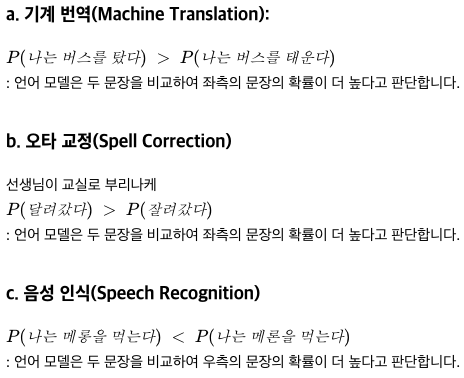

언어 모델은 위와 같이 확률을 통해 **보다 적절한 문장을 판단합니다.**


## 3) 주어진 이전 단어들로부터 다음 단어 예측하기

언어 모델은 단어 시퀀스에 확률을 할당하는 모델입니다. 그리고 단어 시퀀스에 확률을 할당하기 위해서 가장 보편적으로 사용하는 방법은 이전 단어들이 주어졌을 때, 다음 단어를 예측하도록 하는 것입니다. 이를 조건부 확률로 표현해보겠습니다.



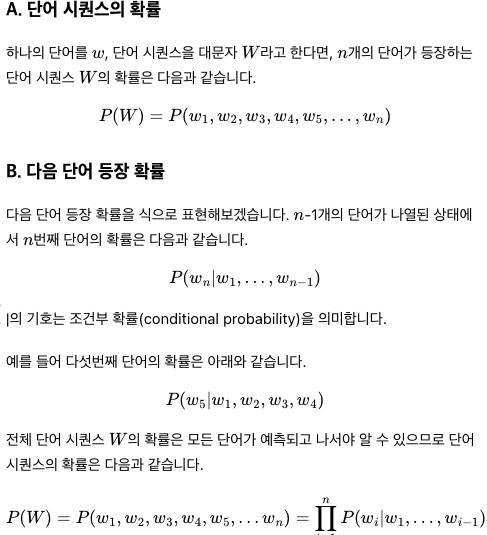

## 4) 언어 모델의 간단한 직관

**비행기를 타려고 공항에 갔는데 지각을 하는 바람에 비행기를 [?]**라는 문장이 있습니다. **'비행기를'** 다음에 어떤 단어가 오게 될지 사람은 쉽게 **'놓쳤다'**라고 예상할 수 있습니다. 우리 지식에 기반하여 나올 수 있는 여러 단어들을 후보에 놓고 놓쳤다는 단어가 나올 확률이 가장 높다고 판단하였기 때문입니다.

그렇다면 기계에게 위 문장을 주고, **'비행기를'** 다음에 나올 단어를 예측해보라고 한다면 과연 어떻게 최대한 정확히 예측할 수 있을까요? 기계도 비슷합니다. 앞에 어떤 단어들이 나왔는지 고려하여 후보가 될 수 있는 여러 단어들에 대해서 확률을 예측해보고 가장 높은 확률을 가진 단어를 선택합니다. 앞에 어떤 단어들이 나왔는지 고려하여 후보가 될 수 있는 여러 단어들에 대해서 등장 확률을 추정하고 가장 높은 확률을 가진 단어를 선택합니다.



## 5) 검색 엔진에서의 언어 모델의 예

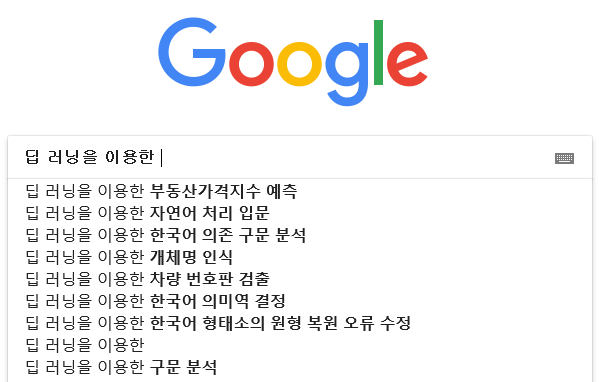

검색 엔진이 입력된 단어들의 나열에 대해서 다음 단어를 예측하는 언어 모델을 사용하고 있습니다.

---

추천하는 언어 모델 참고 자료 :
https://www.cs.bgu.ac.il/~elhadad/nlp18/nlp02.html
http://www.marekrei.com/pub/Machine_Learning_for_Language_Modelling_-_lecture3.pdf



# 2. 통계적 언어 모델(Statistical Language Model, SLM)

언어 모델의 전통적인 접근 방법인 통계적 언어 모델을 소개합니다. 통계적 언어 모델이 통계적인 접근 방법으로 어떻게 언어를 모델링 하는지 배워보겠습니다. 통계적 언어 모델(Statistical Language Model)은 줄여서 SLM이라고 합니다.



## 1) 조건부 확률

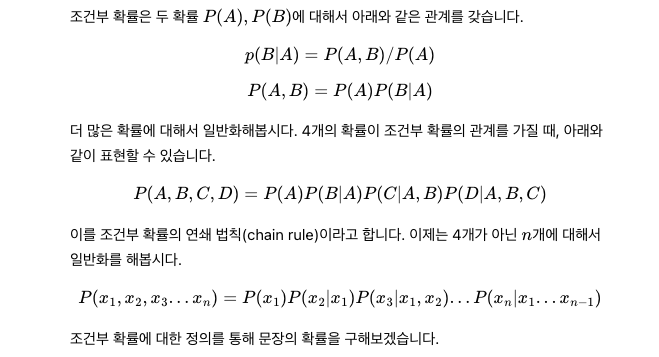

## 2) 문장에 대한 확률

문장 'An adorable little boy is spreading smiles'의 확률

P(An adorable little boy is spreading smiles)를 식으로 표현해봅시다.

각 단어는 문맥이라는 관계로 인해 이전 단어의 영향을 받아 나온 단어입니다. 그리고 모든 단어로부터 하나의 문장이 완성됩니다. 그렇기 때문에 문장의 확률을 구하고자 조건부 확률을 사용하겠습니다. 앞서 언급한 조건부 확률의 일반화 식을 문장의 확률 관점에서 다시 적어보면 문장의 확률은 각 단어들이 이전 단어가 주어졌을 때 다음 단어로 등장할 확률의 곱으로 구성됩니다.



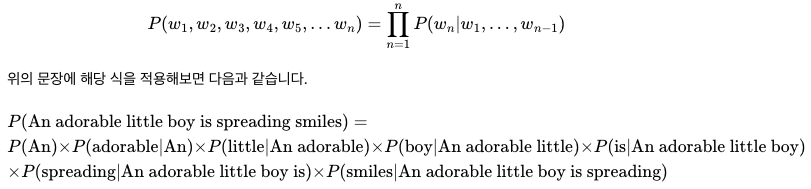

문장의 확률을 구하기 위해서 각 단어에 대한 예측 확률들을 곱합니다.



## 3) 카운트 기반의 접근

문장의 확률을 구하기 위해서 다음 단어에 대한 예측 확률을 모두 곱한다는 것은 알았습니다. 그렇다면 SLM은 이전 단어로부터 다음 단어에 대한 확률은 어떻게 구할까요? 정답은 카운트에 기반하여 확률을 계산합니다.

An adorable little boy가 나왔을 때, is가 나올 확률인
P(is|An adorable little boy)

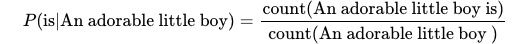

그 확률은 위와 같습니다. 예를 들어 기계가 학습한 코퍼스 데이터에서 An adorable little boy가 100번 등장했는데 그 다음에 is가 등장한 경우는 30번이라고 합시다.
이 경우 P(is|An adorable little boy)
는 30%입니다.



## 4) 카운트 기반 접근의 한계 - 희소 문제(Sparsity Problem)

언어 모델은 실생활에서 사용되는 언어의 확률 분포를 근사 모델링 합니다. 실제로 정확하게 알아볼 방법은 없겠지만 현실에서도 An adorable little boy가 나왔을 때 is가 나올 확률이라는 것이 존재합니다. 이를 실제 자연어의 확률 분포, 현실에서의 확률 분포라고 명칭합시다. 기계에게 많은 코퍼스를 훈련시켜서 언어 모델을 통해 현실에서의 확률 분포를 근사하는 것이 언어 모델의 목표입니다. 그런데 카운트 기반으로 접근하려고 한다면 갖고있는 코퍼스(corpus). 즉, 다시 말해 기계가 훈련하는 데이터는 정말 방대한 양이 필요합니다.



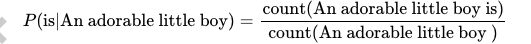

예를 들어 위와 같이 P(is|An adorable little boy)를 구하는 경우에서 기계가 훈련한 코퍼스에 An adorable little boy is라는 단어 시퀀스가 없었다면 이 단어 시퀀스에 대한 확률은 0이 됩니다. 또는 An adorable little boy라는 단어 시퀀스가 없었다면 분모가 0이 되어 확률은 정의되지 않습니다. 그렇다면 코퍼스에 단어 시퀀스가 없다고 해서 이 확률을 0 또는 정의되지 않는 확률이라고 하는 것이 정확한 모델링 방법일까요? 아닙니다. 현실에선 An adorable little boy is 라는 단어 시퀀스가 존재하고 또 문법에도 적합하므로 정답일 가능성 또한 높습니다. 이와 같이 충분한 데이터를 관측하지 못하여 언어를 정확히 모델링하지 못하는 문제를 **희소 문제(sparsity problem)**라고 합니다.



위 문제를 완화하는 방법으로 바로 이어서 배우게 되는 n-gram 언어 모델이나 이 책에서 다루지는 않지만 스무딩이나 백오프와 같은 여러가지 일반화(generalization) 기법이 존재합니다. 하지만 희소 문제에 대한 근본적인 해결책은 되지 못하였습니다. 결국 이러한 한계로 인해 언어 모델의 트렌드는 통계적 언어 모델에서 인공 신경망 언어 모델로 넘어가게 됩니다.



# 3. N-gram 언어 모델(N-gram Language Model)

n-gram 언어 모델은 여전히 카운트에 기반한 통계적 접근을 사용하고 있으므로 SLM의 일종입니다. 다만, 앞서 배운 언어 모델과는 달리 이전에 등장한 모든 단어를 고려하는 것이 아니라 **일부 단어만 고려하는 접근 방법**을 사용합니다. 그리고 이때 일부 단어를 몇 개 보느냐를 결정하는데 이것이 n-gram에서의 n이 가지는 의미입니다.

## 1) 코퍼스에서 카운트하지 못하는 경우의 감소

SLM(통계적 언어 모델)의 한계는 훈련 코퍼스에 확률을 계산하고 싶은 문장이나 단어가 없을 수 있다는 점입니다. 그리고 확률을 계산하고 싶은 문장이 길어질수록 갖고있는 코퍼스에서 그 문장이 존재하지 않을 가능성이 높습니다. 다시 말하면 카운트할 수 없을 가능성이 높습니다. 그런데 다음과 같이 참고하는 단어들을 줄이면 카운트를 할 수 있을 가능성이 높일 수 있습니다.

> P(is|An adorable little boy) ~ P(is|boy)

가령, An adorable little boy가 나왔을 때 is가 나올 확률을 그냥 boy가 나왔을 때 is가 나올 확률로 생각해보는 건 어떨까요? 갖고있는 코퍼스에 An adorable little boy is가 있을 가능성 보다는 boy is라는 더 짧은 단어 시퀀스가 존재할 가능성이 더 높습니다. 조금 지나친 일반화로 느껴진다면 아래와 같이 little boy가 나왔을 때 is가 나올 확률로 생각하는 것도 대안입니다.

> P(is|An adorable little boy) ~ P(is|little boy)

즉, 앞에서는 An adorable little boy가 나왔을 때 is가 나올 확률을 구하기 위해서는 An adorable little boy가 나온 횟수와 An adorable little boy is가 나온 횟수를 카운트해야만 했지만, 이제는 단어의 확률을 구하고자 기준 단어의 앞 단어를 전부 포함해서 카운트하는 것이 아니라, 앞 단어 중 임의의 개수만 포함해서 카운트하여 근사하자는 것입니다. 이렇게 하면 갖고 있는 코퍼스에서 해당 단어의 시퀀스를 카운트할 확률이 높아집니다.



## 2) N-gram

이때 임의의 개수를 정하기 위한 기준을 위해 사용하는 것이 n-gram입니다. 
**n-gram**은 n개의 연속적인 단어 나열을 의미합니다. 갖고 있는 코퍼스에서 n개의 단어 뭉치 단위로 끊어서 이를 하나의 토큰으로 간주합니다. 예를 들어서 문장 An adorable little boy is spreading smiles이 있을 때, 각 n에 대해서 n-gram을 전부 구해보면 다음과 같습니다.



```
unigrams : an, adorable, little, boy, is, spreading, smiles
bigrams : an adorable, adorable little, little boy, boy is, is spreading, spreading smiles
trigrams : an adorable little, adorable little boy, little boy is, boy is spreading, is spreading smiles
4-grams : an adorable little boy, adorable little boy is, little boy is spreading, boy is spreading smiles

```

n-gram을 사용할 때는 n이 1일 때는 유니그램(unigram), 2일 때는 바이그램(bigram), 3일 때는 트라이그램(trigram)이라고 명명하고 n이 4 이상일 때는 gram 앞에 그대로 숫자를 붙여서 명명합니다. 출처에 따라서는 유니그램, 바이그램, 트라이그램 또한 각각 1-gram, 2-gram, 3-gram이라고 하기도 합니다. n-gram을 이용한 언어 모델을 설계해보겠습니다.

n-gram을 통한 언어 모델에서는 다음에 나올 단어의 예측은 오직 n-1개의 단어에만 의존합니다. 예를 들어 **'An adorable little boy is spreading'** 다음에 나올 단어를 예측하고 싶다고 할 때, n=4라고 한 4-gram을 이용한 언어 모델을 사용한다고 합시다. 이 경우, spreading 다음에 올 단어를 예측하는 것은 n-1에 해당되는 앞의 3개의 단어만을 고려합니다.




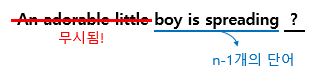
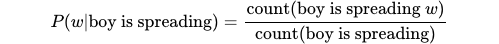

만약 갖고있는 코퍼스에서 boy is spreading가 1,000번 등장했다고 합시다. 그리고 boy is spreading insults가 500번 등장했으며, boy is spreading smiles가 200번 등장했다고 합시다. 그렇게 되면 boy is spreading 다음에 insults가 등장할 확률은 50%이며, smiles가 등장할 확률은 20%입니다. 확률적 선택에 따라 우리는 insults가 더 맞다고 판단하게 됩니다.


P(insults|boy is spreading) = 0.500

P(smiles|boy is spreading) = 0.200

## 3) N-gram Language Model의 한계

앞서 4-gram을 통한 언어 모델의 동작 방식을 확인했습니다. 그런데 조금 의문이 남습니다. 앞서 본 4-gram 언어 모델은 주어진 문장에서 앞에 있던 단어인 **'작고 사랑스러운(an adorable little)'**이라는 수식어를 제거하고, 반영하지 않았습니다. 그런데 **'작고 사랑스러운' **수식어까지 모두 고려하여 **작고 사랑하는 소년**이 하는 행동에 대해 다음 단어를 예측하는 언어 모델이었다면 과연 '작고 사랑스러운 소년이' **'모욕을 퍼트렸다'**라는 부정적인 내용이 **'웃음 지었다'**라는 긍정적인 내용 대신 선택되었을까요?

물론 코퍼스 데이터를 어떻게 가정하느냐의 나름이고, 전혀 말이 안 되는 문장은 아니지만 여기서 지적하고 싶은 것은 n-gram은 뒤의 단어 몇 개만 보다 보니 의도하고 싶은 대로 문장을 끝맺음하지 못하는 경우가 생긴다는 점입니다. 문장을 읽다 보면 앞 부분과 뒷부분의 문맥이 전혀 연결 안 되는 경우도 생길 수 있습니다. 결론만 말하자면, 전체 문장을 고려한 언어 모델보다는 정확도가 떨어질 수밖에 없습니다. 이를 토대로 n-gram 모델에 대한 한계점을 정리해보겠습니다.


### (1) 희소 문제(Sparsity Problem)

문장에 존재하는 앞에 나온 단어를 모두 보는 것보다 일부 단어만을 보는 것으로 현실적으로 코퍼스에서 카운트 할 수 있는 확률을 높일 수는 있었지만, n-gram 언어 모델도 여전히 n-gram에 대한 희소 문제가 존재합니다.

### (2) n을 선택하는 것은 trade-off 문제

앞에서 몇 개의 단어를 볼지 n을 정하는 것은 trade-off가 존재합니다. 임의의 개수인 n을 1보다는 2로 선택하는 것은 거의 대부분의 경우에서 언어 모델의 성능을 높일 수 있습니다. 가령, spreading만 보는 것보다는 is spreading을 보고 다음 단어를 예측하는 것이 더 정확하기 때문입니다. 이 경우 훈련 데이터가 적절한 데이터였다면 언어 모델이 적어도 spreading 다음에 동사를 고르지 않을 것입니다.

n을 크게 선택하면 실제 훈련 코퍼스에서 해당 n-gram을 카운트할 수 있는 확률은 적어지므로 희소 문제는 점점 심각해집니다. 또한 n이 커질수록 모델 사이즈가 커진다는 문제점도 있습니다. 기본적으로 코퍼스의 모든 n-gram에 대해서 카운트를 해야 하기 때문입니다.

n을 작게 선택하면 훈련 코퍼스에서 카운트는 잘 되겠지만 근사의 정확도는 현실의 확률분포와 멀어집니다. 그렇기 때문에 적절한 n을 선택해야 합니다. 앞서 언급한 trade-off 문제로 인해 정확도를 높이려면 **n은 최대 5를 넘게 잡아서는 안 된다고 권장**되고 있습니다.

n이 성능에 영향을 주는 것을 확인할 수 있는 유명한 예제 하나를 보겠습니다. 스탠퍼드 대학교의 공유 자료에 따르면, 월스트리트 저널에서 3,800만 개의 단어 토큰에 대하여 n-gram 언어 모델을 학습하고, 1,500만 개의 테스트 데이터에 대해서 테스트를 했을 때 다음과 같은 성능이 나왔다고 합니다. 뒤에서 배우겠지만, 펄플렉서티(perplexity)는 수치가 낮을수록 더 좋은 성능을 나타냅니다.

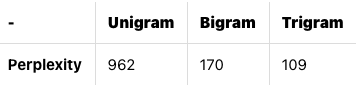

위의 결과는 n을 1에서 2, 2에서 3으로 올릴 때마다 성능이 올라가는 것을 보여줍니다.




## 4) 적용 분야(Domain)에 맞는 코퍼스 수집

어떤 분야인지, 어떤 어플리케이션인지에 따라서 특정 단어들의 확률 분포는 당연히 다릅니다. 가령, 마케팅 분야에서는 마케팅 단어가 빈번하게 등장할 것이고, 의료 분야에서는 의료 관련 단어가 당연히 빈번하게 등장합니다. 이 경우 언어 모델에 사용하는 코퍼스를 해당 도메인의 코퍼스를 사용한다면 당연히 언어 모델이 제대로 된 언어 생성을 할 가능성이 높아집니다.

때로는 이를 언어 모델의 약점이라고 하는 경우도 있는데, 훈련에 사용된 도메인 코퍼스가 무엇이냐에 따라서 성능이 비약적으로 달라지기 때문입니다.



## 5) 인공 신경망을 이용한 언어 모델(Neural Network Based Language Model)

여기서는 다루지 않겠지만, N-gram Language Model의 한계점을 극복하기위해 분모, 분자에 숫자를 더해서 카운트했을 때 0이 되는 것을 방지하는 등의 여러 일반화(generalization) 방법들이 존재합니다. 하지만 그럼에도 본질적으로 n-gram 언어 모델에 대한 취약점을 완전히 해결하지는 못하였고, 이를 위한 대안으로 N-gram Language Model보다 대체적으로 성능이 우수한 인공 신경망을 이용한 언어 모델이 많이 사용되고 있습니다.

---

이해를 돕는 추천 자료 : https://www.edwith.org/deepnlp/lecture/29214/
조경현 교수님이 n-gram 언어 모델에 대해서 강의하시는 파트입니다.
스탠포드 대학교 강의 자료 : https://web.stanford.edu/~jurafsky/slp3/3.pdf
뉴욕대학교 강의 자료 : https://cs.nyu.edu/courses/spring17/CSCI-UA.0480-009/lecture3-and-half-n-grams.pdf




# 4. 한국에서의 언어 모델(Language Model for Korean Sentences)

영어나 기타 언어에 비해서 한국어는 언어 모델로 다음 단어를 예측하기가 훨씬 까다롭습니다.



## 1) 한국어는 어순이 중요하지 않다

한국어에서는 어순이 중요하지 않습니다. 그래서 이전 단어가 주어졌을때, 다음 단어가 나타날 확률을 구해야하는데 어순이 중요하지 않다는 것은 다음 단어로 어떤 단어든 등장할 수 있다는 의미입니다.

예를 들어보겠습니다.


```
Ex)
① 나는 운동을 합니다 체육관에서.
② 나는 체육관에서 운동을 합니다.
③ 체육관에서 운동을 합니다.
④ 나는 운동을 체육관에서 합니다.
```


4개의 문장은 전부 의미가 통하는 것을 볼 수 있습니다. 심지어 '나는' 이라는 주어를 생략해도 말이 되버립니다. 이렇게 단어 순서를 뒤죽박죽으로 바꾸어놔도 한국어는 의미가 전달 되기 때문에 확률에 기반한 언어 모델이 제대로 다음 단어를 예측하기가 어렵습니다.




## 2) 한국어는 교착어이다.

한국어는 교착어입니다. 이는 한국어에서의 언어 모델 작동을 어렵게 만듭니다. 띄어쓰기 단위인 어절 단위로 토큰화를 할 경우에는 문장에서 발생가능한 단어의 수가 굉장히 늘어납니다. 대표적인 예로 교착어인 한국어에는 조사가 있습니다. 영어는 기본적으로 조사가 없습니다. 하지만 한국어에는 어떤 행동을 하는 동사의 주어나 목적어를 위해서 조사라는 것이 있습니다.

가령 '그녀'라는 단어 하나만 해도 그녀가, 그녀를, 그녀의, 그녀와, 그녀로, 그녀께서, 그녀처럼 등과 같이 다양한 경우가 존재합니다. 그렇기 때문에, 한국어에서는 **토큰화**를 통해 접사나 조사 등을 분리하는 것은 중요한 작업이 되기도 합니다.

## 3) 한국어는 띄어쓰기가 제대로 지켜지지 않는다

한국어는 띄어쓰기를 제대로 하지 않아도 의미가 전달되며, 띄어쓰기 규칙 또한 상대적으로 까다로운 언어이기 때문에 자연어 처리를 하는 것에 있어서 한국어 코퍼스는 띄어쓰기가 제대로 지켜지지 않는 경우가 많습니다. 토큰이 제대로 분리 되지 않는채 훈련 데이터로 사용된다면 언어 모델은 제대로 동작하지 않습니다.



# 5. 펄플렉서티(Perplexity, PPL)

두 개의 모델 A, B가 있을 때 이 모델의 성능은 어떻게 비교할 수 있을까요? 두 개의 모델을 오타 교정, 기계 번역 등의 평가에 투입해볼 수 있겠습니다. 그리고 두 모델이 해당 업무의 성능을 누가 더 잘했는지를 비교하면 되겠습니다. 그런데 두 모델의 성능을 비교하고자, 일일히 모델들에 대해서 실제 작업을 시켜보고 정확도를 비교하는 작업은 공수가 너무 많이 드는 작업입니다. 만약 비교해야하는 모델이 두 개가 아니라 그 이상의 수라면 시간은 비교해야하는 모델의 수만큼 배로 늘어날 수도 있습니다.

이러한 평가보다는 어쩌면 조금은 부정확할 수는 있어도 테스트 데이터에 대해서 빠르게 식으로 계산되는 더 간단한 평가 방법이 있습니다. 바로 모델 내에서 자신의 성능을 수치화하여 결과를 내놓는 **펄플렉서티(perplexity)**입니다.



## 1) 언어 모델의 평가 방법(Evaluation metric) : PPL

펄플렉서티(perplexity)는 언어 모델을 평가하기 위한 평가 지표입니다. 보통 줄여서 PPL이 라고 표현합니다. 왜 perplexity라는 용어를 사용했을까요? 영어에서 'perplexed'는 '헷갈리는'과 유사한 의미를 가집니다. 그러니까 여기서 PPL은 '헷갈리는 정도'로 이해합시다. PPL를 처음 배울때 다소 낯설게 느껴질 수 있는 점이 있다면, PPL은 수치가 높으면 좋은 성능을 의미하는 것이 아니라, **'낮을수록' 언어 모델의 성능이 좋다는 것을 의미한다는 점**입니다.

PPL은 문장의 길이로 정규화된 문장 확률의 역수입니다. 문장 W의 길이가 N이라고 하였을 때의 PPL은 다음과 같습니다.

![image.png](88)

## 2) 분기 계수(Branching factor)

PPL은 선택할 수 있는 가능한 경우의 수를 의미하는 **분기계수(branching factor)**입니다. PPL은 이 언어 모델이 특정 시점에서 평균적으로 몇 개의 선택지를 가지고 고민하고 있는지를 의미합니다. 가령, 언어 모델에 어떤 테스트 데이터을 주고 측정했더니 PPL이 10이 나왔다고 해봅시다. 그렇다면 해당 언어 모델은 테스트 데이터에 대해서 다음 단어를 예측하는 모든 시점(time step)마다 평균 10개의 단어를 가지고 어떤 것이 정답인지 고민하고 있다고 볼 수 있습니다. 같은 테스트 데이터에 대해서 두 언어 모델의 PPL을 각각 계산 후에 PPL의 값을 비교하면, 두 언어 모델 중 PPL이 더 낮은 언어 모델의 성능이 더 좋다고 볼 수 있습니다.

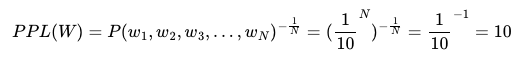

단, 평가 방법에 있어서 주의할 점은 PPL의 값이 낮다는 것은 테스트 데이터 상에서 높은 정확도를 보인다는 것이지, 사람이 직접 느끼기에 좋은 언어 모델이라는 것을 반드시 의미하진 않는다는 점입니다. 또한 언어 모델의 PPL은 테스트 데이터에 의존하므로 두 개 이상의 언어 모델을 비교할 때는 정량적으로 양이 많고, 또한 도메인에 알맞은 동일한 테스트 데이터를 사용해야 신뢰도가 높다는 것입니다.




## 3) 기존 언어 모델 Vs. 인공 신경망을 이용한 언어 모델

페이스북 AI 연구팀은 앞서 배운 n-gram 언어 모델과 이후 배우게 될 딥 러닝을 이용한 언어 모델에 대해서 PPL로 성능 테스트를 한 표를 공개한 바 있습니다.

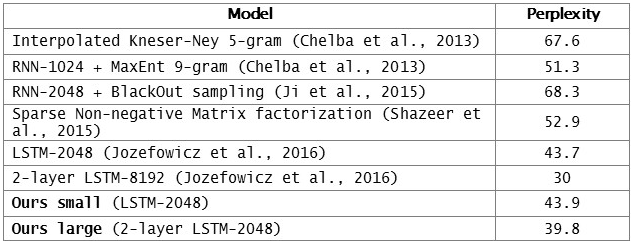
링크 : https://research.fb.com/building-an-efficient-neural-language-model-over-a-billion-words/



표에서 맨 위의 줄의 언어 모델이 n-gram을 이용한 언어 모델이며 PPL이 67.6으로 측정되었습니다. 5-gram을 사용하였으며, 5-gram 앞에 Interpolated Kneser-Ney라는 이름이 붙었는데 이 책에서는 별도 설명을 생략하겠다고 했던 일반화(generalization) 방법이 사용된 모델입니다. 반면, 그 아래의 모델들은 인공 신경망을 이용한 언어 모델들로 페이스북 AI 연구팀이 자신들의 언어 모델을 다른 언어 모델과 비교하고자 하는 목적으로 기록하였습니다. 아직 RNN과 LSTM 등이 무엇인지 배우지는 않았지만, 인공 신경망을 이용한 언어 모델들은 대부분 n-gram을 이용한 언어 모델보다 더 좋은 성능 평가를 받았음을 확인할 수 있습니다.


---

추천하는 참고 링크 :
https://towardsdatascience.com/perplexity-intuition-and-derivation-105dd481c8f3
https://www.slideshare.net/shkulathilake/nlpkashkevaluating-language-model
http://www.statmt.org/book/slides/07-language-models.pdf
https://github.com/kobikun/wiki/wiki/Language-Models
https://courses.engr.illinois.edu/cs447/fa2018/Slides/Lecture03.pdf



# 6. 조건부 확률(Conditional Probability)

이 챕터는 언어 모델(Language Model)과 n-gram의 근간이 되는 조건부 확률의 이해를 위해 작성하는 부록 개념의 예제 챕터입니다.

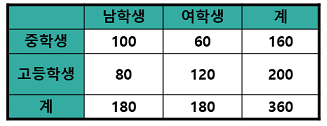

A = 학생이 남학생인 사건
B = 학생이 여학생인 사건
C = 학생이 중학생인 사건
D = 학생이 고등학생인 사건
이라고 했을 때, 아래의 확률을 계산해보겠습니다.

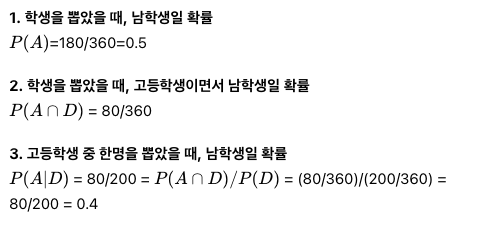